<a href="https://colab.research.google.com/github/cnhzgb/MachineL/blob/main/CNN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

device = "cuda" if torch.cuda.is_available() else "cpu"

trans = transforms.Compose([transforms.ToTensor(), transforms.Normalize(mean=[0.5],std=[0.5])])
dataset = datasets.MNIST(root="dataset/", transform=trans, download=True, train=True) # 6W张图片
loader = DataLoader(dataset, batch_size=100, shuffle=True)
batch_num,(image, label) = next(enumerate(loader))
print(image.shape, label.shape) # 100,1,28,28 ; 100

100%|██████████| 9912422/9912422 [00:00<00:00, 93721734.60it/s]


Extracting dataset/MNIST/raw/train-images-idx3-ubyte.gz to dataset/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 19897452.99it/s]


Extracting dataset/MNIST/raw/train-labels-idx1-ubyte.gz to dataset/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 23754195.16it/s]


Extracting dataset/MNIST/raw/t10k-images-idx3-ubyte.gz to dataset/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 4359388.73it/s]

Extracting dataset/MNIST/raw/t10k-labels-idx1-ubyte.gz to dataset/MNIST/raw



torch.Size([100, 1, 28, 28]) torch.Size([100])


In [2]:
class net(nn.Module):
  def __init__(self):
    super(net, self).__init__()
    self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size = 3, stride = 1, padding = 1)
    self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size = 3, stride = 1, padding = 1)
    self.pool = nn.MaxPool2d(kernel_size = 2, stride = 2)
    self.relu = nn.ReLU()
    self.fc1 = nn.Linear(3136, 512)
    self.fc2 = nn.Linear(512, 10)

  def forward(self, x): # 100,1,28,28
    x = self.relu(self.conv1(x)) # => 100,32,28,28
    x = self.pool(x) # => 100,32,14,14
    x = self.relu(self.conv2(x)) # => 100,64,14,14
    x = self.pool(x) # => 100,64,7,7
    x = x.view(x.size(0), -1) # => 100,3136
    x = self.relu(self.fc1(x)) # => 100,512
    x = self.fc2(x) # => 100,10
    return x

model = net().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-4)

In [3]:
for epoch in range(1,4):
  total_loss = []
  errorTotal = 0
  for batch_idx, (img, label) in enumerate(loader):
    img = img.to(device)
    label = label.to(device)
    outputs = model(img)
    loss = criterion(outputs, label)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    total_loss.append(loss.item())
    maxV,maxIdx = outputs.max(dim=1)
    errorNum = torch.sum(torch.ne(maxIdx, label)).item()
    errorTotal += errorNum

    if(batch_idx % 100 == 99):
      print("epoch:{} batch:{} loss:{:.2f} mean:{:.2f} error:{}/100 errorTotal:{}/{} {:.2f}%".format(epoch, batch_idx, loss, np.mean(total_loss), errorNum, errorTotal, (batch_idx+1)*100, errorTotal/(batch_idx+1)))

epoch:1 batch:99 loss:0.60 mean:1.42 error:17/100 errorTotal:3332/10000 33.32%
epoch:1 batch:199 loss:0.36 mean:0.92 error:11/100 errorTotal:4491/20000 22.45%
epoch:1 batch:299 loss:0.19 mean:0.71 error:4/100 errorTotal:5373/30000 17.91%
epoch:1 batch:399 loss:0.21 mean:0.59 error:7/100 errorTotal:6035/40000 15.09%
epoch:1 batch:499 loss:0.12 mean:0.52 error:3/100 errorTotal:6621/50000 13.24%
epoch:1 batch:599 loss:0.12 mean:0.46 error:4/100 errorTotal:7106/60000 11.84%
epoch:2 batch:99 loss:0.15 mean:0.15 error:4/100 errorTotal:431/10000 4.31%
epoch:2 batch:199 loss:0.13 mean:0.14 error:3/100 errorTotal:815/20000 4.08%
epoch:2 batch:299 loss:0.06 mean:0.13 error:1/100 errorTotal:1176/30000 3.92%
epoch:2 batch:399 loss:0.07 mean:0.13 error:3/100 errorTotal:1477/40000 3.69%
epoch:2 batch:499 loss:0.09 mean:0.12 error:4/100 errorTotal:1744/50000 3.49%
epoch:2 batch:599 loss:0.12 mean:0.12 error:4/100 errorTotal:2014/60000 3.36%
epoch:3 batch:99 loss:0.04 mean:0.09 error:1/100 errorTotal:

In [4]:
trans_test = transforms.Compose([transforms.ToTensor(), transforms.Normalize(mean=[0.5],std=[0.5])])
dataset_test = datasets.MNIST(root="dataset/", transform=trans_test, download=True, train=False) # 1W张图片
loader_test = DataLoader(dataset_test, batch_size=100, shuffle=True)
criterion_test = nn.CrossEntropyLoss()

batch:9 loss:0.08 mean:0.06 error:3/100 errorTotal:15/1000 1.50%


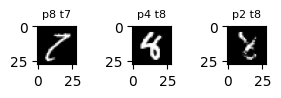

batch:19 loss:0.06 mean:0.07 error:1/100 errorTotal:36/2000 1.80%


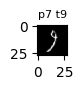

batch:39 loss:0.05 mean:0.06 error:1/100 errorTotal:72/4000 1.80%


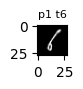

batch:59 loss:0.07 mean:0.06 error:3/100 errorTotal:113/6000 1.88%


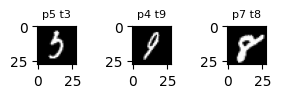

batch:69 loss:0.08 mean:0.06 error:5/100 errorTotal:131/7000 1.87%


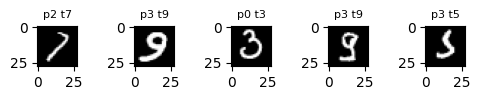

batch:79 loss:0.06 mean:0.06 error:2/100 errorTotal:153/8000 1.91%


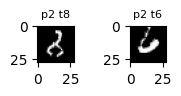

batch:89 loss:0.04 mean:0.06 error:2/100 errorTotal:178/9000 1.98%


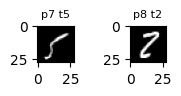

batch:99 loss:0.03 mean:0.06 error:1/100 errorTotal:203/10000 2.03%


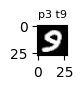

In [7]:
total_loss = []
errorTotal = 0
for batch_idx, (img, label) in enumerate(loader_test): # 1W张图片, 100批, 100,1,28,28
  img = img.to(device)
  label = label.to(device)

  output = model(img)
  loss = criterion_test(output, label)
  total_loss.append(loss.item())

  maxV,maxIdx = output.max(dim=1)
  errorNum = torch.sum(torch.ne(maxIdx, label)).item()
  errorTotal += errorNum

  noMatchIdx = torch.nonzero(torch.ne(maxIdx, label)).view(-1)

  if(batch_idx % 10 == 9 and errorNum > 0):
    print("batch:{} loss:{:.2f} mean:{:.2f} error:{}/100 errorTotal:{}/{} {:.2f}%".format(batch_idx, loss, np.mean(total_loss), errorNum, errorTotal, (batch_idx+1)*100, errorTotal/(batch_idx+1)))

    fig, axs = plt.subplots(nrows = 1, ncols = errorNum, figsize=(errorNum, 1))
    if not isinstance(axs, np.ndarray):
      axs = [axs]
    for i in range(errorNum):
      ax = axs[i]
      idx = noMatchIdx[i]
      ax.imshow(img[idx][0].cpu(), cmap='gray')
      ax.set_title('p{} t{}'.format(maxIdx[idx], label[idx]), fontsize=8)
    plt.tight_layout()
    plt.show()